In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies =pd.read_csv('mymoviedb.csv')

In [3]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
Release_Date         9837 non-null object
Title                9828 non-null object
Overview             9828 non-null object
Popularity           9827 non-null float64
Vote_Count           9827 non-null object
Vote_Average         9827 non-null object
Original_Language    9827 non-null object
Genre                9826 non-null object
Poster_Url           9826 non-null object
dtypes: float64(1), object(8)
memory usage: 691.7+ KB


In [5]:
movies.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [6]:
movies.shape

(9837, 9)

In [7]:
#dropping the useless column 
colums = ["Poster_Url","Overview","Original_Language"]
movies.drop(colums,axis=1,inplace=True)

In [8]:
#chaingtype of Release_Date to datetime and will extract year
movies['Release_Date'] = pd.to_datetime(movies['Release_Date'] , errors='coerce')
movies["year"]=pd.to_datetime(movies["Release_Date"]).dt.year
movies.drop(["Release_Date"],axis=1,inplace=True)

In [9]:
movies['year'] = movies['year'].astype("Int64")

In [11]:
movies.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War",2021


In [15]:
movies.Popularity = pd.to_numeric(movies.Popularity,errors='coerce')

In [16]:
movies.Vote_Count = pd.to_numeric(movies.Vote_Count,errors='coerce')

In [17]:
movies.Vote_Average = pd.to_numeric(movies.Vote_Average,errors='coerce')

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
Title           9828 non-null object
Popularity      9827 non-null float64
Vote_Count      9826 non-null float64
Vote_Average    9826 non-null float64
Genre           9826 non-null object
year            9827 non-null Int64
dtypes: Int64(1), float64(3), object(2)
memory usage: 470.8+ KB


In [19]:
movies.duplicated().sum()

8

In [20]:
movies.drop_duplicates(keep=False,inplace=True)

In [64]:
#drops the current index with an index of increasing integers
filter_Genre = movies.set_index('Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filter_Genre

Title
Spider-Man: No Way Home                             Action
Spider-Man: No Way Home                          Adventure
Spider-Man: No Way Home                    Science Fiction
The Batman                                           Crime
The Batman                                         Mystery
The Batman                                        Thriller
No Exit                                           Thriller
Encanto                                          Animation
Encanto                                             Comedy
Encanto                                             Family
Encanto                                            Fantasy
The King's Man                                      Action
The King's Man                                   Adventure
The King's Man                                    Thriller
The King's Man                                         War
The Commando                                        Action
The Commando                                      

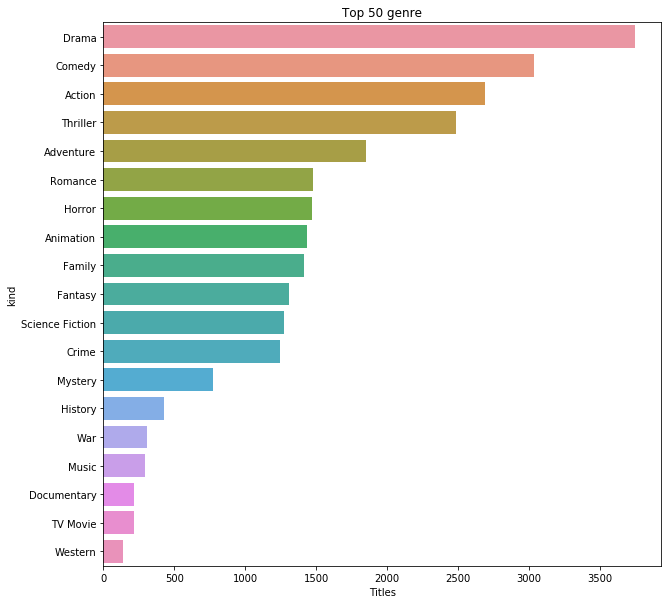

In [58]:
plt.figure(figsize=(10,10))
Genre = sns.countplot(y = filter_Genre, order=filter_Genre.value_counts().index[:50])
plt.title('Top 50 genre')
plt.xlabel('Titles')
plt.ylabel('kind')
plt.show()

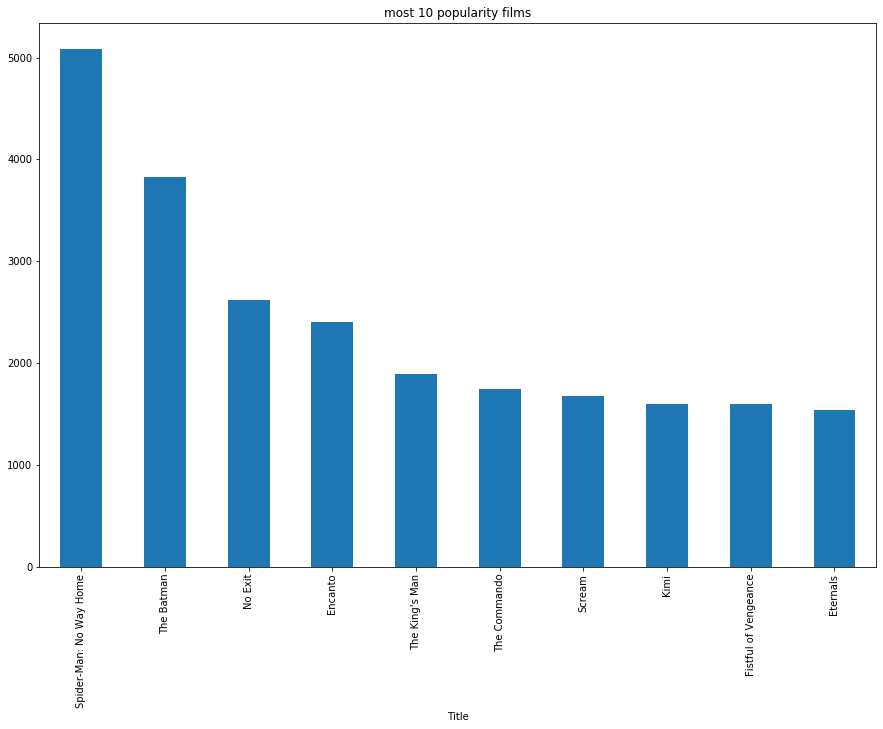

In [69]:
movie_most_pop=movies.groupby(["Title"])["Popularity"].max().sort_values(ascending=False)[:10]
plt.title("most 10 popularity films")
movie_most_pop.plot.bar(figsize=(15,10))

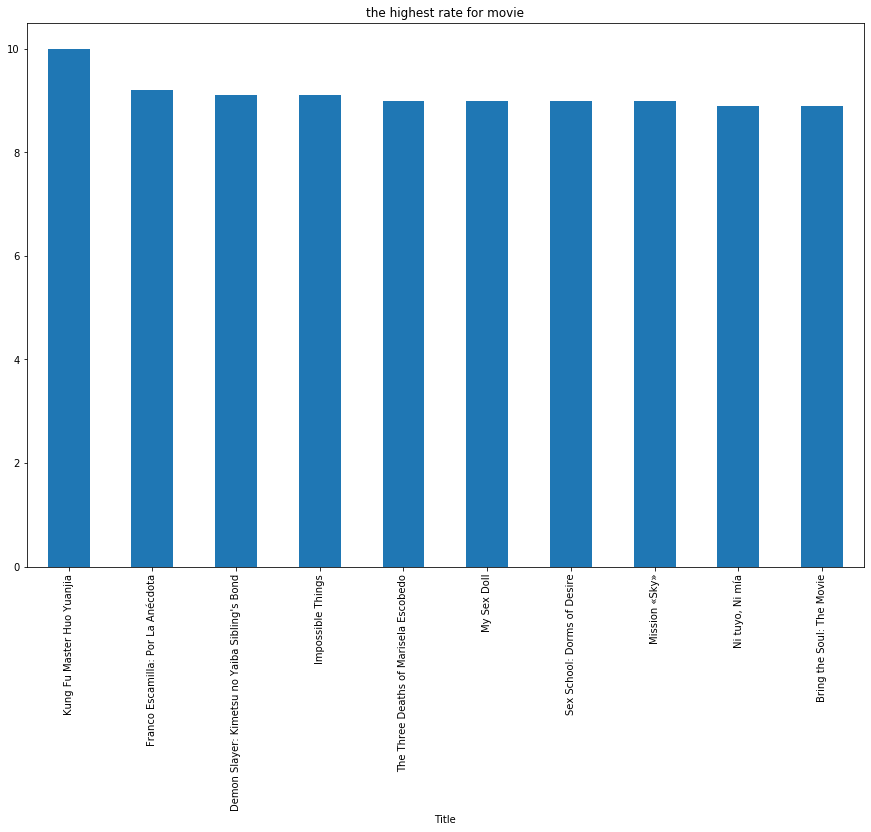

In [80]:
movie_most_pop=movies.groupby(["Title"])["Vote_Average"].max().sort_values(ascending=False)[:10]
plt.title("the highest rate for movie")
movie_most_pop.plot.bar(figsize=(15,10))

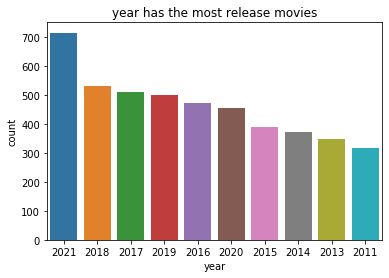

In [91]:
ax= sns.countplot(data=movies, x="year", order=movies["year"].value_counts().index[:10])
plt.title("year has the most release movies")
plt.show()

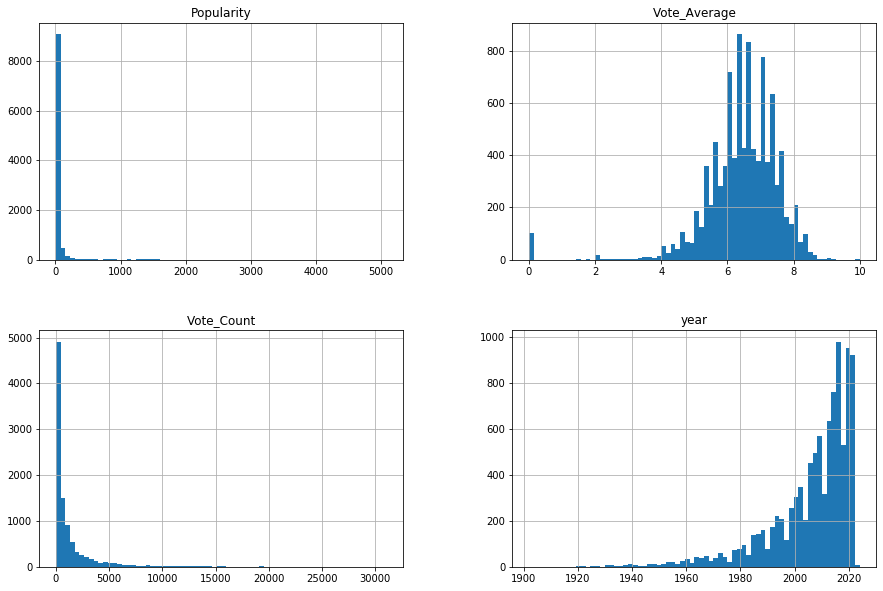

In [97]:
movies.hist(bins = 70,figsize = (15,10));